<b> Descriptive Statistics</b>

*  Descriptive statistics focus on data summarization.
*  It’s the science of processing raw data into meaningful information. Descriptive statistics can be performed with graphs, tables, or summary statistics.

*  summary statistics is the most popular way to do descriptive statistics,

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Measures of Central Tendency**


1.   Mean
2.   Median
1.   Mode


In [ ]:
# What is the average billing of Restaurant?
avg_billing = tips["total_bill"].mean()
avg_billing

19.78594262295082

In [ ]:
# What is the median price of total_bill?
median_price = tips["total_bill"].median()
median_price

17.795

In [ ]:
# Which size of tip is mostly given to waiters?
mode_size =  tips["size"].mode()
mode_size                         # 0 index  size 2

0    2
Name: size, dtype: int64

**Measures of Spread**


<b>1.  Range</b><br>
<b>2.  Variance:</b>
*    Variance is a measurement of spread that informs our data
*   Variance can be interpreted as a value indicating how far the data is spread to the mean and each other.

*   Higher variance means a wider data spread.
*   variance calculation is sensitive to the outlier because we squared the scores' deviations from the mean; it means we gave more weight to the outlier.

<b>3.  Standard Deviation</b>


*  The difference between variance and the standard deviation is in the information their value gave.
*   Variance value only indicates how spread our values were from the mean, and the variance unit differs from the original value as we squared the original values.

*   the standard deviation value is the same unit as the original data value, which means the standard deviation value can be used directly to measure our data's spread.

<b>4.  Interquartile Range</b>

*   Interquartile Range (IQR) is a measure of spread calculated using the differences between the first and third quartile data.
*   The quartile itself is a value that divides the data into four different parts.

*   The quartile is the value that divides the data rather than the result of the division.














In [ ]:
# Find the range of tips given to waiters?
range_tips = tips["tip"].max() - tips["tip"].min()
range_tips

9.0

In [ ]:
#Find the variance of tips
tips["tip"].var()

1.914454638062471

In [ ]:
#Find Standard Deviation of total_bill
tips["total_bill"].std()

8.902411954856856

In [ ]:
q1, q3= np.percentile(tips['tip'], [25 ,75])  #[q1 line at 25,q3 line at75]
iqr = q3 - q1

print(f'Q1: {q1}\nQ3: {q3}\nIQR: {iqr}')    # i.e \n for new line

Q1: 2.0
Q3: 3.5625
IQR: 1.5625


<b> Boxplot </b>

*   Bottom Line(First Line) : Minimum
*   Second Line : Q1

*   Third Line : Median/Q2
*   Fourth Line : Q3

*  Fifth Line : Limit of maximum data items and above this all data items are outlier
*  All points above Fifth  line known as Outliers

*  IQR (inter Quartile Range: It is the difference of Q3 and Q1 (IQR = Q3 - Q1)

<Axes: ylabel='tip'>

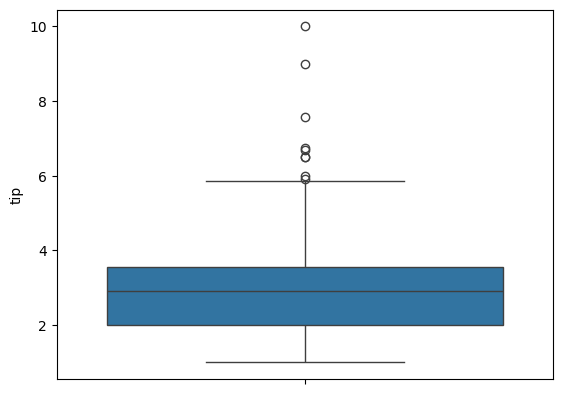

In [ ]:
sns.boxplot(tips['tip'])

In [ ]:
print("Minimum Tip :",tips["tip"].min())
print("Q1 :",q1)
print("Median/Q2 :",tips["tip"].median())
print("Q3 :",q3)
print("Maximum Tip :",tips["tip"].max())

Minimum Tip : 1.0
Q1 : 2.0
Median/Q2 : 2.9
Q3 : 3.5625
Maximum Tip : 10.0


<b> Inferential Statistics </b>

*   Inferential statistics is a branch that generalizes the population information based on the data sample it comes from.
*   Inferential statistics is used because it is often impossible to get the whole data population, and we need to make inferential from the data sample.

*  For example, we want to understand how Indonesia people’s opinions about AI. However, the study would take too long if we surveyed everyone in the Indonesian population. Hence, we use the sample data representing the population and make inferences about the Indonesian population's opinion about AI.*







<b>1. Standard Error </b>

In [ ]:
from scipy.stats import sem    # standard error mean

round(sem(tips['tip']),3)        #3 i.e round till three decimal

0.089

In [ ]:
data_mean = round(tips['tip'].mean(),3)    #3 i.e
print("Mean of Data : ",data_mean)
data_sem = round(sem(tips['tip']),3)
print(f'The true population mean is estimated to fall within the range of {data_mean+data_sem} to {data_mean-data_sem}')

Mean of Data :  2.998
The true population mean is estimated to fall within the range of 3.087 to 2.9090000000000003


<b>2. Confidence Interval</b>

In [ ]:
import scipy.stats as st   # object st

st.norm.interval(confidence=0.95, loc=data_mean, scale=data_sem) # confidence=0.95

(2.8235632053759354, 3.172436794624065)

The above result could be interpreted that our data true population mean falls between the range 2.82 to 3.17 with 95% confidence level.

<b>3. Hypothesis Testing</b>

In [ ]:
st.ttest_ind(tips[tips['sex'] == 'Male']['tip'], tips[tips['sex'] == 'Female']['tip'])

TtestResult(statistic=1.387859705421269, pvalue=0.16645623503456755, df=242.0)

In the t-test, we compare the means between two groups (pairwise test). <br>
<b>The null hypothesis</b> for the t-test is that there are no differences between the two groups' mean, <br><b>the alternative hypothesis</b> is that there are differences between the two groups' mean.<br>

<b>The t-test</b> result shows that the tip between the Male and Female is not significantly different because the <b>P-value is above 0.05 significance level</b>. <br>It means we failed to reject the null hypothesis and conclude that there are no differences between the two groups' means.